In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')
from matplotlib import rcParams, cycler

In [2]:
DATA_PATH = "data/population_by_age.csv"

file = pd.read_csv(DATA_PATH, index_col=0, parse_dates=['Location'])
data = pd.DataFrame(file, columns= ['Location', 'Time', 'AgeGrpStart', 'PopTotal'])
data[['Time', 'AgeGrpStart', 'PopTotal']] = data[['Time', 'AgeGrpStart', 'PopTotal']].apply(pd.to_numeric)

/home/louise/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data_loc = data.loc[data['Location'] == 'Italy']
data_loc = data_loc.loc[(data_loc['Time'] <= 2020)]

      Location  Time  AgeGrpStart  PopTotal
LocID                                      
380      Italy  1950            0  4391.298
380      Italy  1950            5  3858.010
380      Italy  1950           10  4190.737
380      Italy  1950           15  4047.985
380      Italy  1950           20  3999.239
...        ...   ...          ...       ...
380      Italy  2020           80  2302.393
380      Italy  2020           85  1397.261
380      Italy  2020           90   639.739
380      Italy  2020           95   172.639
380      Italy  2020          100    16.517

[1491 rows x 4 columns]


/home/louise/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


Text(0.5, 1.0, 'Italy')

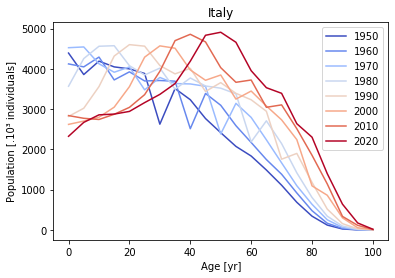

In [5]:
dates = np.asarray(data_loc['Time'].drop_duplicates())

fig = plt.figure()
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(dates)/9 +1)))

for i in range (0,len(dates)):
    data_loc_i = data_loc.loc[data_loc['Time'] == dates[i]]
    y = data_loc_i['PopTotal']
    x = data_loc_i['AgeGrpStart']
    
    if(np.mod(i,10) == 0):
        plt.plot(x, y, label=dates[i])
    
plt.xlabel('Age [yr]')
plt.ylabel('Population [.10³ individuals]')
plt.legend(loc ='upper right')
plt.title('Italy')

In [6]:
fig.savefig('pop_Italy.png', dpi=100, bbox_inches = "tight")

In [6]:
from scipy import interpolate

x = np.linspace(0, 100, 101)
data_file = pd.DataFrame()
data_file['Age'] = x

for i in range (0,len(dates)):
    samples = data_loc.loc[data_loc['Time'] == dates[i]]
    y_nodes = samples['PopTotal']
    x_nodes = samples['AgeGrpStart']
    tck = interpolate.splrep(x_nodes, y_nodes, s=0)
    pop = interpolate.splev(x, tck, der=0)
    data_file[dates[i]] = pop
    
data_file.to_csv("population_PH.csv")

 ## Interpolation of the curve

In [7]:
from scipy import interpolate

x = np.linspace(0, 100, 101)
samples = data_loc.loc[data_loc['Time'] == 1950]
#samples['PopTotal'] /= 5
samples['AgeGrpMid'] = samples['AgeGrpStart'].add(2.5)
y_nodes = samples['PopTotal']
x_nodes = samples['AgeGrpMid']

tck = interpolate.splrep(x_nodes, y_nodes, s=0)
pop = interpolate.splev(x, tck, der=0)

/home/louise/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


94886.18001518432


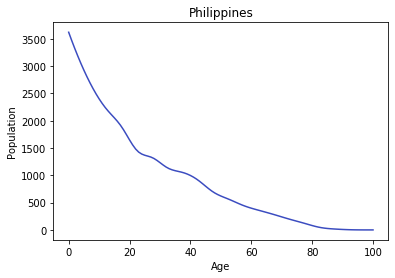

In [11]:
fig = plt.figure()
plt.plot(x, pop)
plt.xlabel('Age')
plt.ylabel('Population')
plt.title('Philippines')

P = np.sum(pop)
print(P)

In [9]:
data_file = pd.DataFrame()
data_file['Age'] = x
data_file['PopTotal'] = pop
data_file.to_csv("initial_pop_ph_spline.csv")